# SPORTS PERFORMANCE ANALYSIS

In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [59]:
#Load the dataset
df=pd.read_csv("S:\ML\ML1\Week2\sports.csv")
print(df.head())

   accuracy  speed  stamina  age performance
0        85    8.2       75   23        Good
1        90    8.5       80   25   Excellent
2        78    7.9       70   20     Average
3        88    8.1       78   24        Good
4        92    8.7       85   27   Excellent


In [60]:
#Features and target
x=df[['accuracy','speed','stamina','age']].copy()
y=df['performance'].copy()

In [61]:
#Include Outliners
outliner=pd.DataFrame([[200,15,150,30]],columns=x.columns)
x=pd.concat([x,outliner],ignore_index=True)

In [62]:
#Add a corresponding target value for the outlier using pd.concat
y=pd.concat([y,pd.Series(['excellent'])],ignore_index=True)

In [63]:
#Split the data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [64]:
#Train K-NN MOdel
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [65]:
#Prediction
y_pred=knn.predict(x_test)

In [66]:
#Evaluate with zero_division set to 1 to avoid warnings
print(classification_report(y_test,y_pred,zero_division=1))

              precision    recall  f1-score   support

     Average       0.00      1.00      0.00       0.0
   Excellent       1.00      0.00      0.00       1.0
        Good       1.00      0.00      0.00       1.0

    accuracy                           0.00       2.0
   macro avg       0.67      0.33      0.00       2.0
weighted avg       1.00      0.00      0.00       2.0



In [67]:
#Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", conf_matrix)


Confusion Matrix:
 [[0 0 0]
 [1 0 0]
 [1 0 0]]


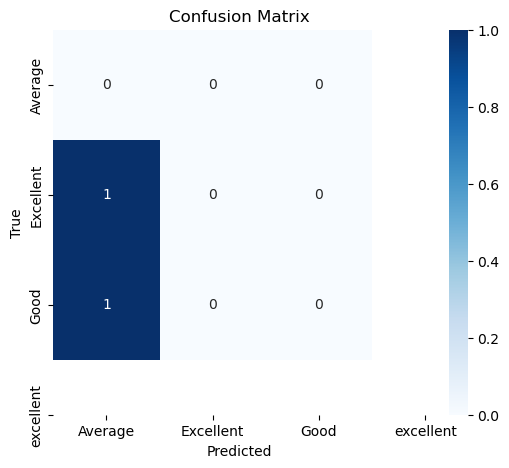

In [68]:
# Plotting the Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=knn.classes_, yticklabels=knn.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()